# Proyecto Integrador - Python Avanzado
## Customer Personality Analysis

Dataset for this project can be found in the following link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

### Context
#### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes

##### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

##### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
Need to perform clustering to summarize customer segments.

### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

# Importing Required libraries

In [1]:
import pdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import cdist
from dotenv import dotenv_values,load_dotenv
from matplotlib.colors import ListedColormap

pd.set_option("display.max_columns", 999)

# Defining functions

In [2]:
def generate_histograms(variable, title, rotate_x_axis=False):
    # Ajustes de la figura de Matplotlib
    if variable.dtype in ['float', 'float64', 'int', 'int64']:
        fig, ((ax_box, ax_dummy), (ax_hist, ax_des)) = plt.subplots(
            nrows=2, ncols=2, figsize=(14, 4), sharex=True,
            gridspec_kw={"height_ratios": (.15, .85)},
            constrained_layout=True)
        fig.set_constrained_layout_pads(
            hspace=0.0, h_pad=0.0,
            wspace=0.0, w_pad=0.2,)
    elif variable.dtype != 'O':
        fig, (ax_hist, ax_des) = plt.subplots(
            nrows=1, ncols=2, figsize=(14, 4), sharex=True,
            constrained_layout=True)
        fig.set_constrained_layout_pads(
            wspace=0.0, w_pad=0.2,)
    else:
        fig, ax_hist = plt.subplots(
            nrows=1, ncols=1, figsize=(14, 4), sharex=True)

    # Plotea el histograma
    hist = sns.histplot(data=variable, ax=ax_hist, kde=False)
    ax_hist.set_xlabel(title)
    ax_hist.set_ylabel('Frecuency')
    
    # Plotea la curva de densidad
    if variable.dtype != 'O':
        des = sns.kdeplot(data=variable, ax=ax_des, fill=True)
        ax_des.set_xlabel(title)
        ax_des.set_ylabel('Density')
        # Plot the BoxPlot
        if variable.dtype in ['float', 'float64', 'int', 'int64']:
            sns.boxplot(x=variable, ax=ax_box)
            ax_box.set(xlabel='')
            ax_box.get_yaxis().set_ticks([])
            ax_box.tick_params(axis='x', which='both', bottom=False)
            ax_box.spines['bottom'].set_visible(False)
            ax_hist.spines['top'].set_visible(False)

    plt.draw()
    if rotate_x_axis:
        # set_xticks is to avoid 'UserWarning: FixedFormatter'
        ax_hist.set_xticks(ax_hist.get_xticks())
        labels = [x.get_text() for x in ax_hist.get_xticklabels()]
        ax_hist.set_xticklabels(labels, rotation=45)
        
        if variable.dtype != 'O':
            ax_des.set_xticks(ax_des.get_xticks())
            labels = [x.get_text() for x in ax_des.get_xticklabels()]
            ax_des.set_xticklabels(labels, rotation=45)

    if variable.dtype in ['float', 'float64', 'int', 'int64']:
        ax_dummy.spines['top'].set_visible(False)
        ax_dummy.spines['right'].set_visible(False)
        ax_dummy.spines['bottom'].set_visible(False)
        ax_dummy.spines['left'].set_visible(False)
        # ax_dummy.get_xaxis().set_ticks([])
        ax_dummy.tick_params(axis='x', which='both', bottom=False)
        ax_dummy.get_yaxis().set_ticks([])
        
    fig.suptitle(f'Univariate Analysis: {title}')

# Loading Dataset

In [3]:
path_to_dataset = r"C:\Projects\avst\advanced_python\proyecto_integrador\marketing_campaign.csv"
df = pd.read_csv(path_to_dataset, sep='\t')
df['Age'] = 2023 - df['Year_Birth']
display(df.shape)
df.head()

(2240, 30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


# Defining some list of columns based on the type of columns

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [5]:
list_people_cols = [
    'ID', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']
list_products_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds']
list_promotion_cols = [
    'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Response']
list_place_cols = [
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth']

# Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [8]:
df[df['Marital_Status']=='YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0,50
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,50


In [9]:
clean_cols = list(set(df.columns) - {'ID', 'Response'})
df_clean = df[clean_cols].drop_duplicates()
display(df.shape)
display(df_clean.shape)

(2240, 30)

(2039, 28)

In [10]:
clean_cols = list(set(df.columns) - {'ID'})
df_clean = df[clean_cols].drop_duplicates()
display(df.shape)
display(df_clean.shape)

(2240, 30)

(2058, 29)

Looks like that there are ~200 duplicated records

# Univariate Analysis
## Age

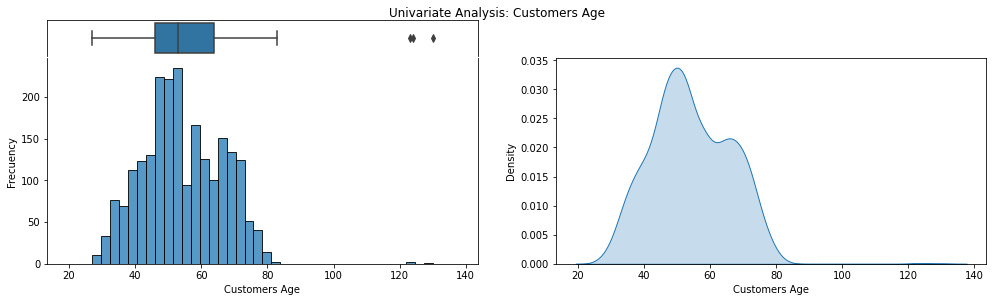

In [11]:
generate_histograms(df['Age'], "Customers Age")

In [12]:
df_age_outliers = df[df['Age'] > 90]
display(len(df_age_outliers))
df_age_outliers

3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,123
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,130
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,124


### Removing outliers

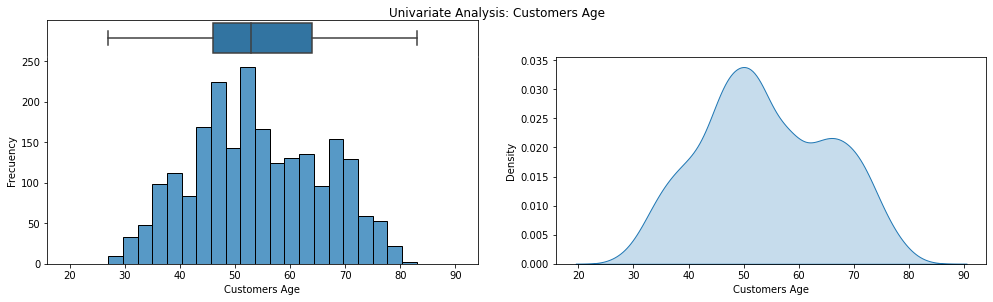

In [13]:
df_age_clean = df[df['Age'] < 100]
generate_histograms(df_age_clean['Age'], "Customers Age")

## Income

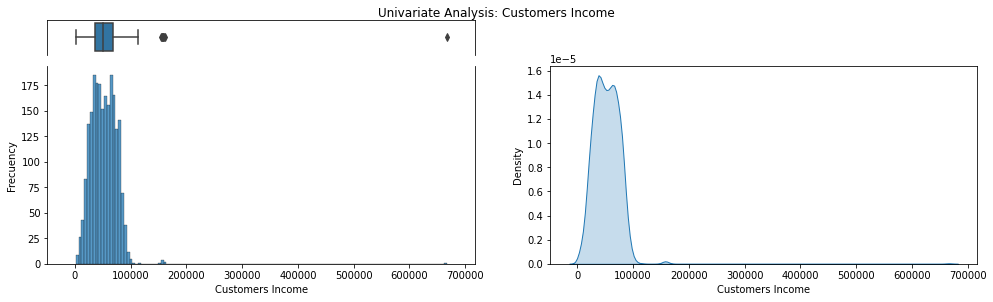

In [18]:
generate_histograms(df['Income'], "Customers Income")

In [19]:
df['Income'].agg(['min', 'mean', 'max'])

min       1730.000000
mean     52247.251354
max     666666.000000
Name: Income, dtype: float64

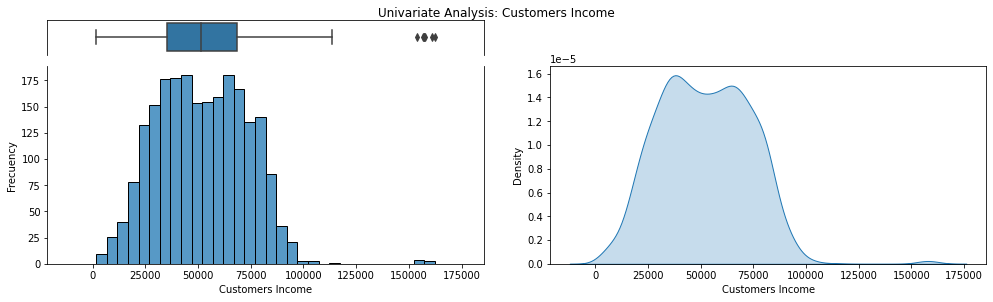

In [20]:
df_income = df[df['Income'] < 200000]
generate_histograms(df_income['Income'], "Customers Income")

In [21]:
df_income['Income'].agg(['min', 'mean', 'max'])

min       1730.0000
mean     51969.8614
max     162397.0000
Name: Income, dtype: float64

## Recency
Number of days since customer's last purchase

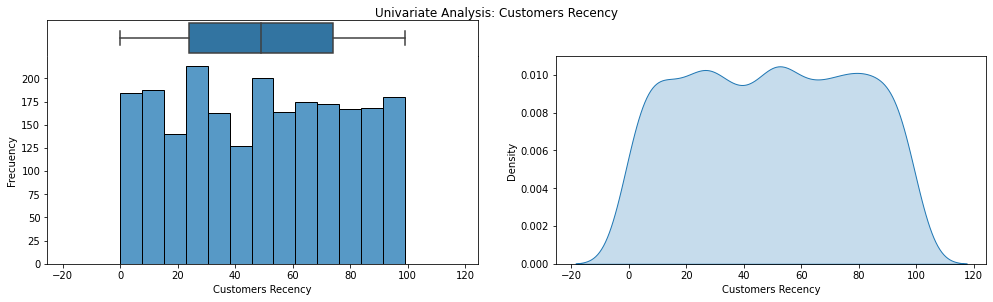

In [22]:
generate_histograms(df['Recency'], "Customers Recency")

## Date Customer's enrollment
Date of customer's enrollment with the company

In [14]:
df['Dt_Customer'].drop_duplicates().head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

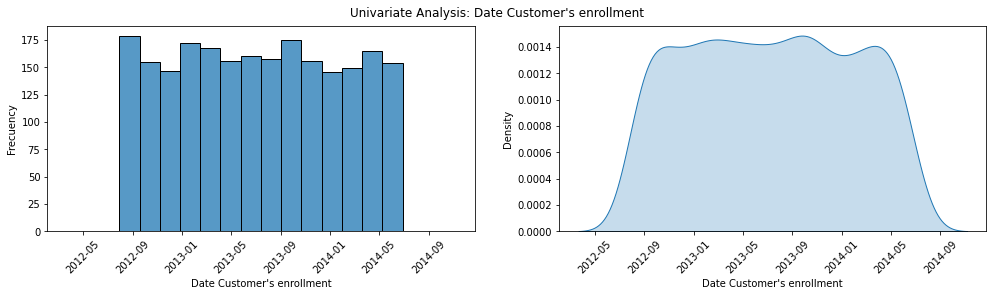

In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
generate_histograms(df['Dt_Customer'], "Date Customer's enrollment", rotate_x_axis=True)

## Marital Status

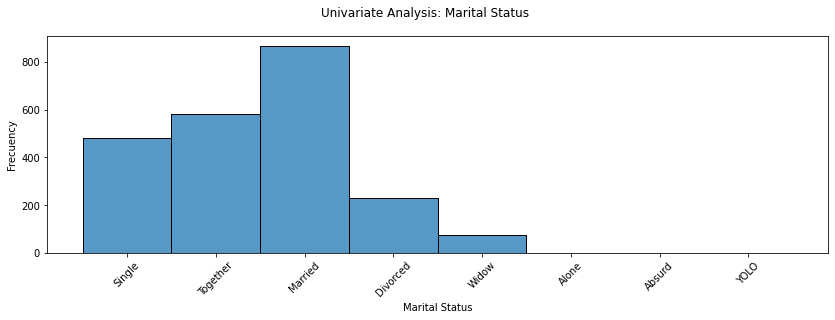

In [16]:
generate_histograms(df['Marital_Status'], "Marital Status", rotate_x_axis=True)

### Removing the Marital Status that doesnt make sense

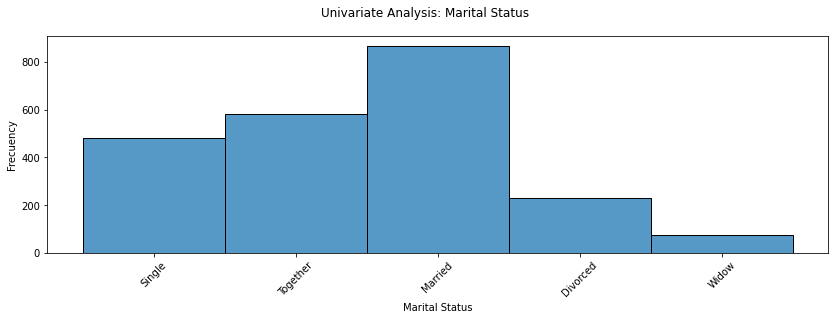

In [17]:
vals_to_remove = ['Alone', 'Absurd', 'YOLO']
df_ma_status = df[~df['Marital_Status'].isin(vals_to_remove)]
generate_histograms(df_ma_status['Marital_Status'], "Marital Status", rotate_x_axis=True)

### Education

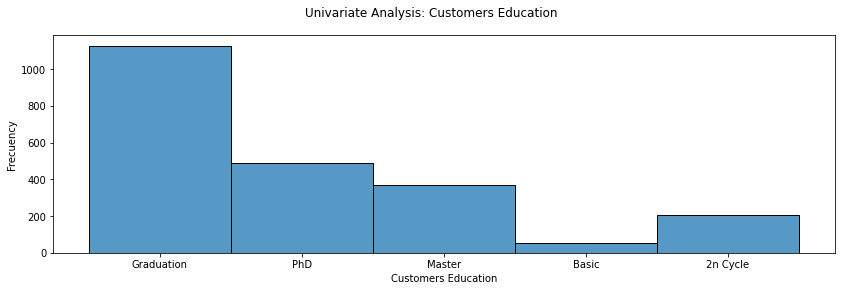

In [23]:
generate_histograms(df['Education'], "Customers Education")

## Products

In [52]:
df_products = df[list_products_cols].agg(["max", "mean", "sum"]).T
df_products.reset_index(inplace=True)
df_products.rename({"index": "Products"}, axis=1, inplace=True)
df_products = df_products.sort_values(by=['sum'], ascending=False)
df_products

,Products,max,mean,sum
0,MntWines,1493.0,303.935714,680816.0
2,MntMeatProducts,1725.0,166.950000,373968.0
5,MntGoldProds,362.0,44.021875,98609.0
3,MntFishProducts,259.0,37.525446,84057.0
4,MntSweetProducts,263.0,27.062946,60621.0
1,MntFruits,199.0,26.302232,58917.0


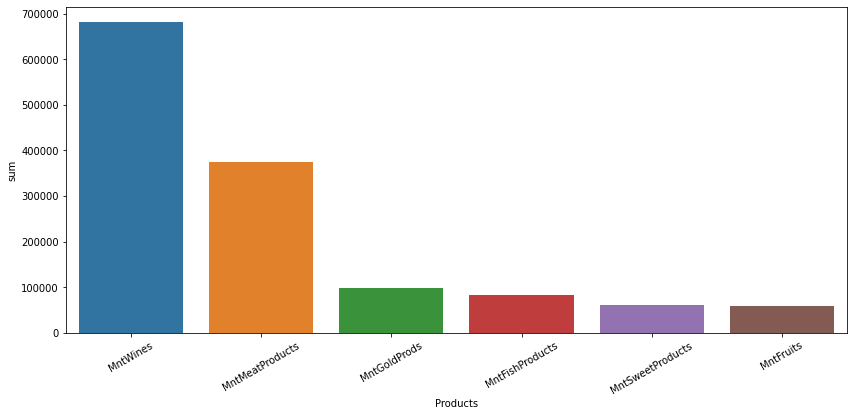

In [53]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=df_products, x="Products", y="sum", ax=ax)
_ = plt.xticks(rotation=30)

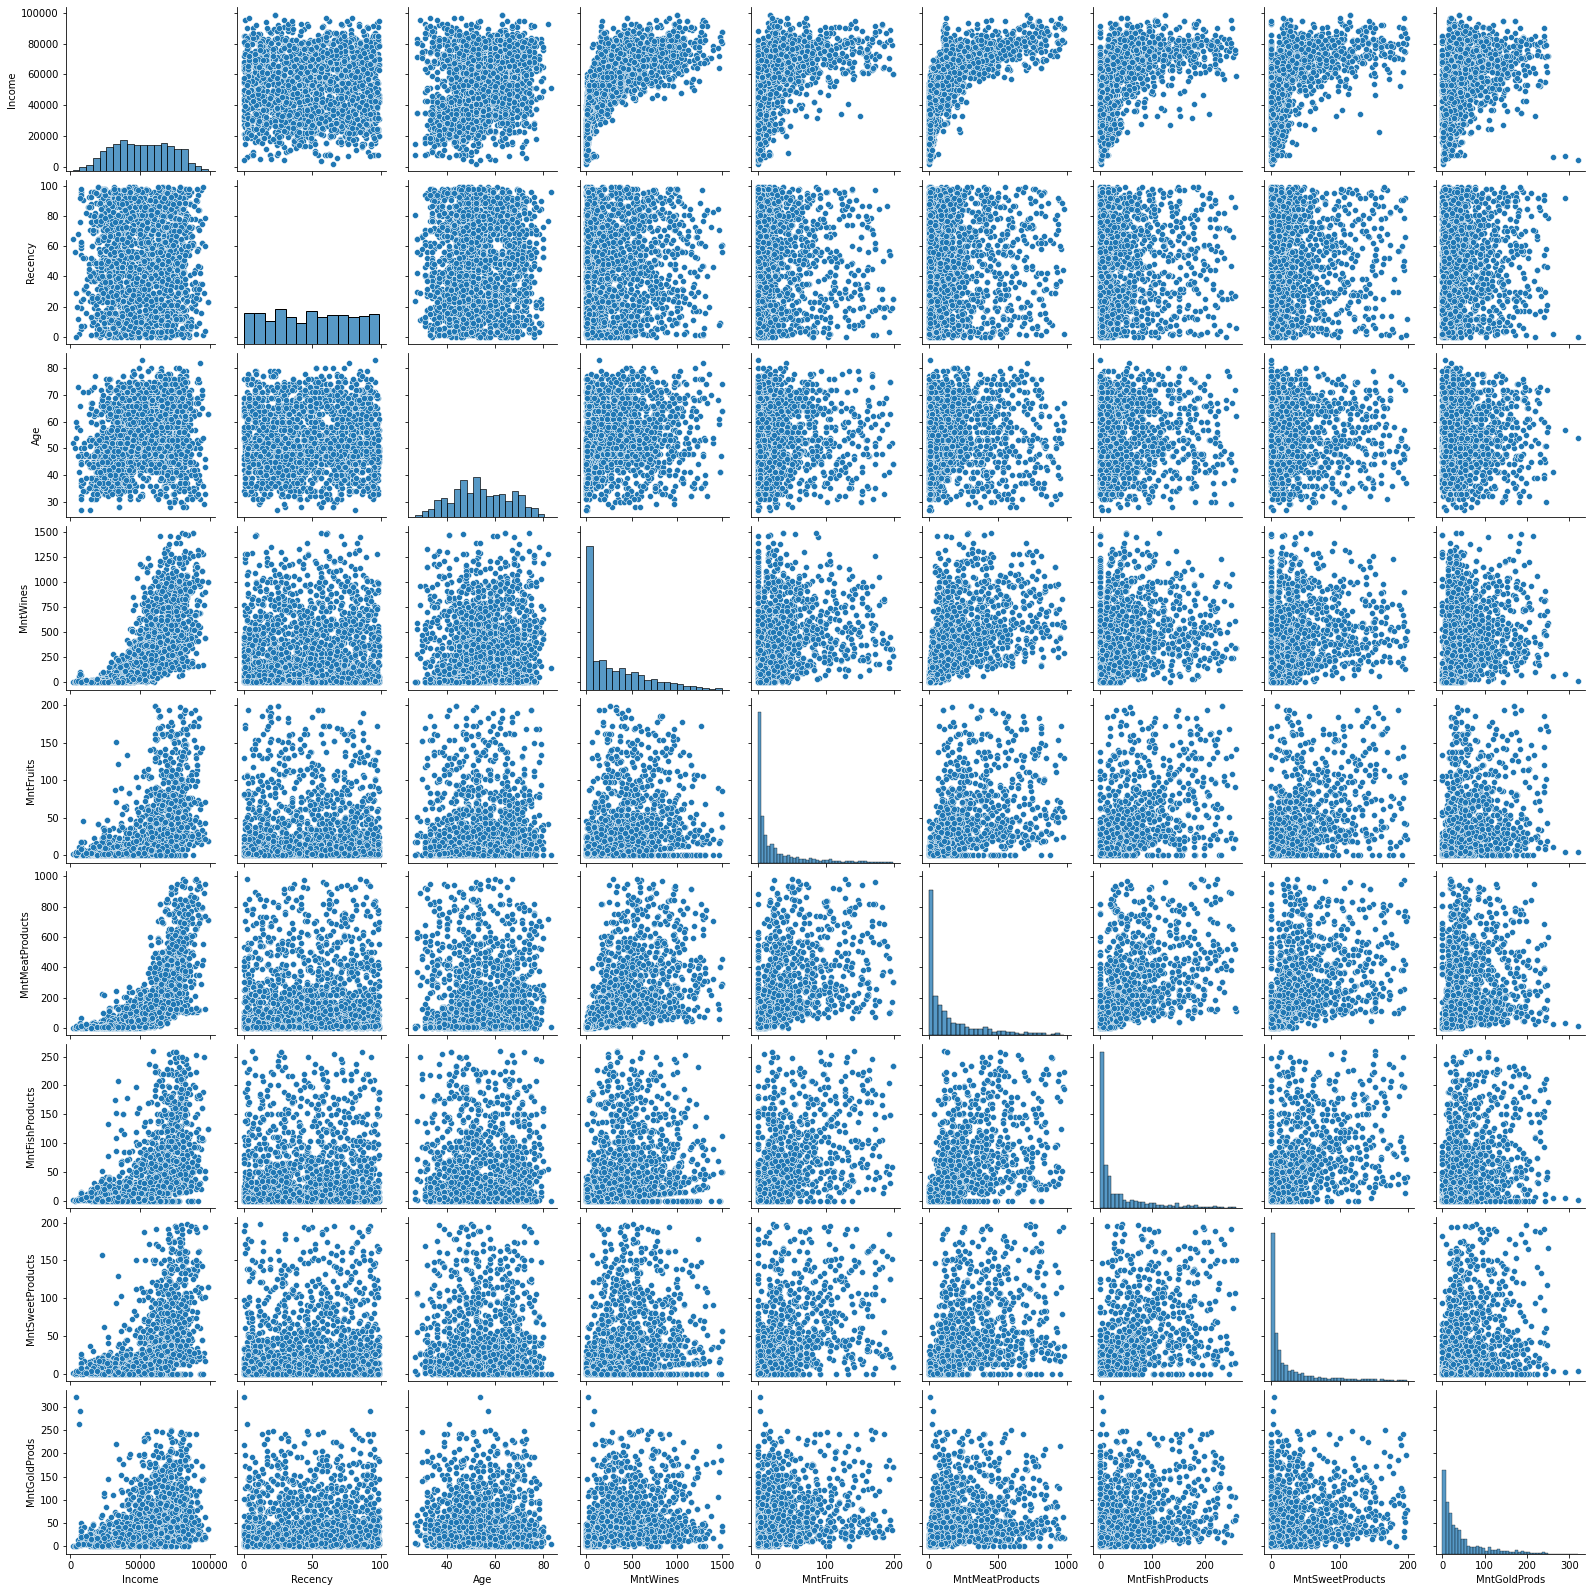

In [61]:
cols_to_use = list(set(list_people_cols) - {'ID', 'Year_Birth', 'Complain', 'Kidhome', 'Teenhome', 'Dt_Customer'})
cols_to_use += list_products_cols
df_clean = df[cols_to_use]
df_clean = df_clean[df_clean['Income'] < 100000]
df_clean = df_clean[df_clean['Age'] < 90]
df_clean = df_clean[df_clean['MntMeatProducts'] < 1250]
sns.pairplot(df_clean, diag_kind="hist")

In [62]:
df_correlation = df_clean
df_correlation.corr()

C:\Users\mibolano\AppData\Local\Temp/ipykernel_19152/3927431420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation.corr()


,Income,Recency,Age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income,1.000000,0.009720,0.213870,0.734021,0.537851,0.725902,0.553894,0.550538,0.414612
Recency,0.009720,1.000000,0.015568,0.015515,-0.002485,0.027760,0.001137,0.031294,0.019343
Age,0.213870,0.015568,1.000000,0.166638,0.014371,0.045710,0.041767,0.018238,0.062026
MntWines,0.734021,0.015515,0.166638,1.000000,0.384310,0.605197,0.393852,0.394844,0.388115
MntFruits,0.537851,-0.002485,0.014371,0.384310,1.000000,0.579068,0.591802,0.578826,0.387842
MntMeatProducts,0.725902,0.027760,0.045710,0.605197,0.579068,1.000000,0.606972,0.573541,0.384103
MntFishProducts,0.553894,0.001137,0.041767,0.393852,0.591802,0.606972,1.000000,0.593164,0.423556
MntSweetProducts,0.550538,0.031294,0.018238,0.394844,0.578826,0.573541,0.593164,1.000000,0.359534
MntGoldProds,0.414612,0.019343,0.062026,0.388115,0.387842,0.384103,0.423556,0.359534,1.000000


C:\Users\mibolano\AppData\Local\Temp/ipykernel_19152/3569670891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_correlation.corr(), cmap='YlGnBu', annot=True);


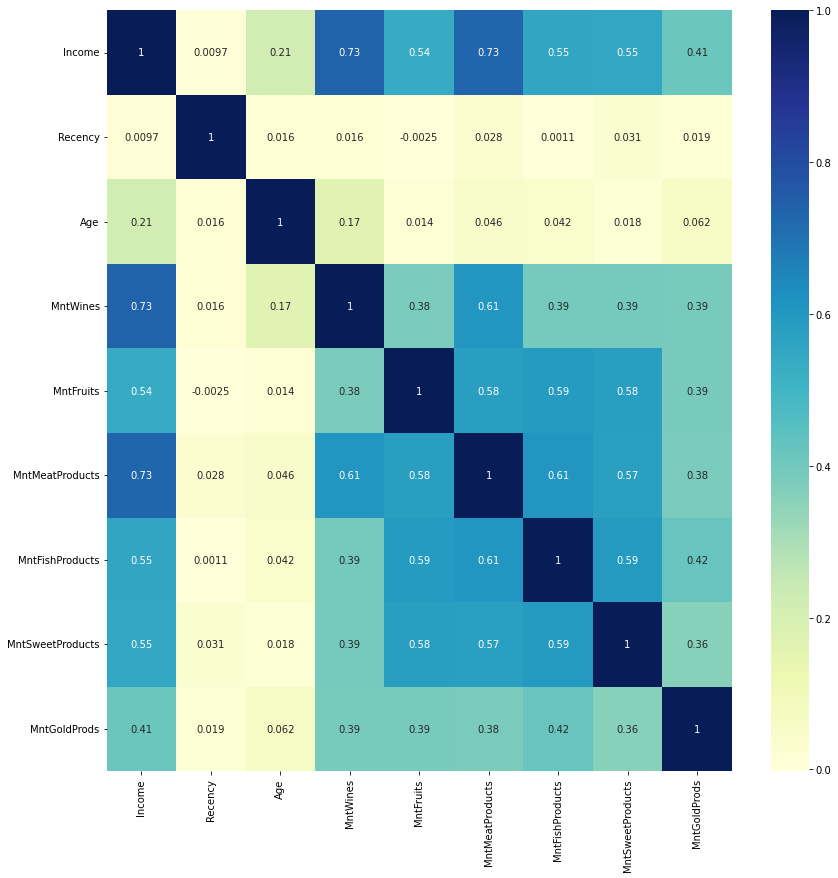

In [63]:
fig = plt.figure(figsize = (14, 14))
sns.heatmap(df_correlation.corr(), cmap='YlGnBu', annot=True);

# Multivariate Analysis